# Лабораторная работа №4
## Выполнил студент группы БВТ2004 Станолевич Владислав

Реализовать следующие структуры данных:
  
● <b> Стек (stack): </b>  
Операции для стека: 
<i> инициализация, проверка на пустоту, добавление нового элемента в начало, извлечение элемента из начала;  </i>  
  
● <b> Дек (двусторонняя очередь, deque):  </b>  
Операции для дека: 
<i> инициализация, проверка на пустоту, добавление нового элемента в начало, добавление нового элемента в конец, извлечение элемента из начала, извлечение элемента из конца. </i>  
  
<i> Разработать программу обработки данных, содержащихся в заранее подготовленном txt-файле, в соответствии с заданиями, применив указанную в задании структуру данных. Результат работы программы вывести на экран и сохранить в отдельном txt-файле. </i>

In [113]:
class Stack:
    
    def Empty(self):
        return self.items == []
    
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items)-1]

    def size(self):
        return len(self.items)

In [114]:
class Deque:
    
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def addFront(self, item):
        self.items.append(item)

    def addRear(self, item):
        self.items.insert(0,item)

    def removeFront(self):
        return self.items.pop()

    def removeRear(self):
        return self.items.pop(0)

    def size(self):
        return len(self.items)
    
    def peek(self):
        return self.items[-1]

### Задание №1
Отсортировать строки файла, содержащие названия книг, в алфавитном порядке с использованием двух деков.

In [108]:
file = open('text1.txt', 'r+')
books = 'Толстой Антипов Твен Шульц Ерохин Брагин Даль Егоров Латышев Розенталь '

deq1 = Deque()
deq2 = Deque()

books = books.split(" ") # books = books.split("/n")
for book in books:
    deq1.addRear(book)
    
while not deq1.isEmpty():
    a = deq1.removeRear()
    while not deq2.isEmpty() and deq2.peek() > a:
        deq1.addRear(deq2.removeFront()) 
    deq2.addFront(a)
while not deq2.isEmpty():
    print(deq2.removeRear())

file.close()


Антипов
Брагин
Даль
Егоров
Ерохин
Латышев
Розенталь
Твен
Толстой
Шульц


### Задание №2
Дек содержит последовательность символов для шифровки сообщений. Дан текстовый файл, содержащий зашифрованное сообщение. Пользуясь деком, расшифровать текст. 
Известно, что при шифровке каждый символ сообщения заменялся следующим за ним в деке по часовой стрелке через один.

In [109]:
file = open('text2.txt', 'r')
str = 'иветпр' 
d = Deque()
for i in range (len(str)-2,len(str)+len(str)-2,1):
    if (i<len(str)):
        d.addRear(str[i])
    else:
        d.addRear(str[i-len(str)])
print(d.items)
file.close()

['т', 'е', 'в', 'и', 'р', 'п']


### Задание №3
Даны три стержня и n дисков различного размера. Диски можно надевать на стержни, образуя из них башни. Перенести n дисков со стержня А на стержень С, сохранив их первоначальный порядок. При переносе дисков необходимо соблюдать следующие правила:
- на каждом шаге со стержня на стержень переносить только один диск;
- диск нельзя помещать на диск меньшего размера;
- для промежуточного хранения можно использовать стержень В.
Реализовать алгоритм, используя три стека вместо стержней А, В, С. Информация о дисках хранится в исходном файле.

In [110]:
from typing import TypeVar, Generic, List
T = TypeVar('T')

class Stack(Generic[T]):

    def __init__(self) -> None:
        self._container: List[T] = []

    def push(self, item: T) -> None:
          self._container.append(item)

    def pop(self) -> T:
          return self._container.pop()

    def __repr__(self) -> str:
          return repr(self._container)
num_discs: int = 7
tower_a: Stack[int] = Stack()
tower_b: Stack[int] = Stack()
tower_c: Stack[int] = Stack()
for i in range(1, num_discs + 1):
     tower_a.push(i)
def hanoi(begin: Stack[int], end: Stack[int], temp: Stack[int], n: int) ->None:
    if n == 1:
        end.push(begin.pop())
    else:
        hanoi(begin, temp, end, n-1)
        hanoi(begin, end, temp, 1)
        hanoi(temp, end, begin, n-1)
if __name__ == "__main__":
    hanoi(tower_a, tower_c, tower_b, num_discs)
    print(tower_a)
    print(tower_b)
    print(tower_c)

[]
[]
[1, 2, 3, 4, 5, 6, 7]


### Задание №4
Дан текстовый файл с программой на алгоритмическом языке. За один просмотр файла проверить баланс круглых скобок в тексте, используя стек.

In [115]:
def parChecker(symbolstring):
    s = Stack()
    b = True
    index = 0
    while ((index < len(symbolstring)) and b):
        symbol = symbolstring[index]
        if symbol == "(":
            s.push(symbol)
        else:
            if s.Empty():
                b = False
            else:
                s.pop()
        index = index + 1

    if b and s.Empty():
        return True
    else:
        return False

file = open('text4.txt', 'r')
line = file.read()
if (parChecker(line)):
    print('Ошибки со скобками найдены')
else:
    print('Ошибки со скобками не найдены')
    

file.close()

Ошибки со скобками не найдены


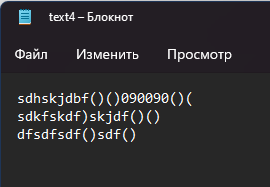

### Задание №5
Дан текстовый файл с программой на алгоритмическом языке. За один просмотр файла проверить баланс квадратных скобок в тексте, используя дек.

In [86]:
def parChecker(symbolstring):
    s = Deque()
    b = True
    index = 0
    while ((index < len(symbolstring)) and b):
        symbol = symbolstring[index]
        if symbol == "(":
            s.addFront(symbol)
        else:
            if symbol == ")":
                if s.isEmpty():
                    b = False
                else:
                    s.removeRear()
        index = index + 1

    if b and s.isEmpty():
        return True
    else:
        return False
                
file = open('text3.txt', 'r')
stroka = file.read()
if (parChecker(stroka)):
    print('Ошибок со скобками не найдено')
else:
    print('Ошибки со скобками найдены')
    

file.close()   
    

Ошибки со скобками найдены


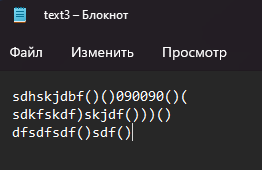

### Задание №6
Дан файл из символов. Используя стек, за один просмотр файла напечатать сначала все цифры, затем все буквы, и, наконец, все остальные символы, сохраняя исходный порядок в каждой группе символов.

In [104]:
file = open('text5.txt', 'r')
stroka = file.read()

letters = Stack()  
digits = Stack()
others = Stack()
    
for symbol in stroka:
    if symbol.isdigit():
        digits.push(symbol)
    elif symbol.isalpha():
        letters.push(symbol)
    else:
        others.push(symbol)

digits1 = ''    
letters1 = ''
others1 = ''

while not digits.Empty():
    digits1 += digits.pop()
while not letters.Empty():
    letters1 += letters.pop()
while not others.Empty():
    others1 += others.pop()
    
print('Letters: ', letters1[::-1])
print('Digits: ', digits1[::-1])
print('Others: ', others1[::-1])
        
file.close()

Letters:  sdhfjksbfksdkskhjfsfiwfiwefwwrwerwerjwbefkjnhjsdbfjbdfdfkhbjsdfskdfsbdfjhsdfbsdfskdbf
Digits:  2349823932934239472384238827
Others:  ?/...<<.,]]..,


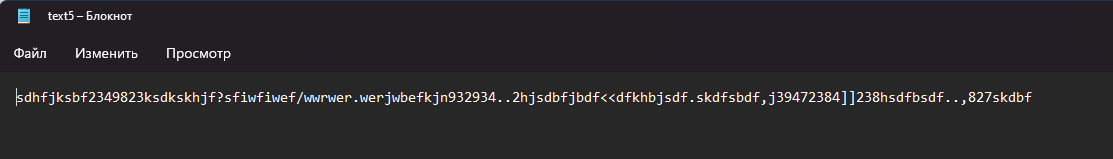

### Задание №7
Дан файл из целых чисел. Используя дек, за один просмотр файла напечатать сначала все отрицательные числа, затем все положительные числа, сохраняя исходный порядок в каждой группе.

In [88]:
file = open('text6.txt', 'r')
nums = file.read()

nums = nums.split(' ')
deq = Deque()

for num in nums: #запись в обратном порядке; - влево, + вправо
    if int(num) < 0:
        deq.addRear(num)
    else:
        deq.addFront(num)

while not deq.isEmpty(): #перемещаю - вправо, + продвигаются к левому краю; так происходит reverse порядка на начальный
    a = deq.removeRear()
    if int(a) < 0:
        deq.addFront(a)
    else:
        deq.addRear(a)
        break

while not deq.isEmpty(): #извлекаем справа все - числа, доходим до +, когда понимаем, что это +, возвращаем обратно в deq
    a = deq.removeFront()
    if int(a) < 0:
        print(a)
    else:
        deq.addFront(a)
        break

while not deq.isEmpty(): #печатаем оставшиеся положительные числа
    print(deq.removeRear())
    
print(nums)

-7
-100
-14
-17
-90
-186
1
2
3
1
6
8
789
87
91
67
['1', '2', '3', '1', '6', '-7', '8', '-100', '-14', '789', '-17', '87', '-90', '91', '67', '-186']


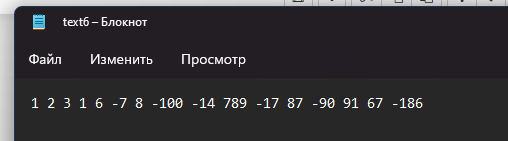

### Задание №8
Дан текстовый файл. Используя стек, сформировать новый текстовый файл, содержащий строки исходного файла, записанные в обратном порядке: первая строка становится последней, вторая – предпоследней и т.д.

In [105]:
f = "text8.txt"
fo = "text8new.txt"
def rev(fl, flo):
    fl = open(fl)
    stck = Stack()
    for line in fl:
        print(line, end="")
        stck.push(line.replace('\n',""))
    fl.close()
    print("\n----------------")
    flo = open(flo, 'w')
    while not stck.Empty():
        i = stck.pop()
        print(i)
        flo.write(i+'\n')
    flo.close()
rev(f,fo)

There
those
thousand
thinkers
were
thinking
how
did
the
other
three
thieves
go
through
----------------
through
go
thieves
three
other
the
did
how
thinking
were
thinkers
thousand
those
There


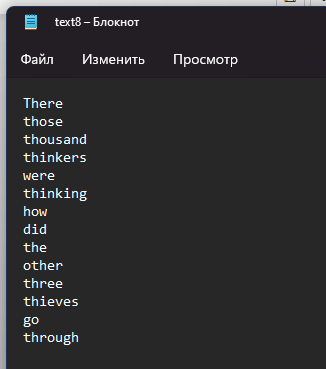

### Вывод


Дек - последовательность, которая предоставляет последовательный доступ к элементам. Удаление и добавление элментов в дек производится с обоих его концов. Дек - динамический массив. Добавление элементов сверх его длины приводит к отбрасыванию элементов с его конца.
В стеке элементы добавляются и удаляются в его вершине. Стек организован по принципу First In - First Out. 